# AirBnB Project for  **Project: Write A Data Science Blog Post**

### 0.1  Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.
   I chose the AirBnnB dataset.  Because why not..

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## 0.2 [Rubric](https://review.udacity.com/#!/rubrics/1507/view)

#### Code Functionality and Readability
* Code is readable (uses good coding practices - PEP8) 
* Code is functional.
* Write code that is well documented and uses functions and classes as necessary.

#### Data
* Project follows the CRISP-DM Process while analyzing their data.
* Proper handling of categorical and missing values in the dataset.
* Categorical variables are handled appropriately for machine learning models (if models are created). 

#### Analysis, Modeling, Visualization
* There are 3-5 business questions answered.
	
#### Github Repository
* Student must publish their code in a public Github repository.
	
#### Blog Post
* Communicate their findings with stakeholders.
* There should be an intriguing title and image related to the project.
* The body of the post has paragraphs that are broken up by appropriate white space and images.
* Each question has a clearly communicated solution.

##  0.3  CRISP-DM
### 0.3.1 Business Understanding/Data Understanding
          AirBnB is an online marketplace for vacation/temporary houseing rentals.  Thier members/hosts own the property and rent via the  AirBnB marketplace.
          
          The data provides was provided each from Seattle and Bostom
          * listing.csv
          * calendar.csv
          * reviews.csv
          
          How to best position your property to make the most revenue?
          1) What time of year is best to make your property availible to get the most money?
              Summer months for most properties, but there seem to bes some very high outliers around the holidays...
          2) Know your capacity?   What neighborhoods/property type/property attributes sell better?
   
          3) What do you need in your profile to garuntee your property is reviewed and reviewed high
          
          
### 0.3.2 Data Preparation
        1) Imported listing and calendar
        #clean_cal() and clean_listing()
        2) Corrected and adjusted datatypes  
        3) Took some columns and made them into booleans (presnence or absence of awnser)
        
        
     
#### 0.3.2.1 Cleaning Data
        Price is our response variable
        1) removed all rows where price was NA
        2) Removed a column that was mostly NAs
        3) removed a few rows of the remaining NA
        
        
### 0.3.3 Modeling
### 0.3.4 Evaluation
### 0.3.5 Deployment

## 1.1 Header

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op

#stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import ast
import math
import os
from datetime import date

#Graphing
import seaborn as sns
import matplotlib.pyplot as plt
import helper as h

#Data modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import pca

In [2]:
PATH = os.getcwd()+"\All Data"
PATH

'C:\\Users\\thoma\\Documents\\Udacity\\DSND_Term2\\project_files\\AirBnB\\All Data'

In [3]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'b_calendar.csv',
 'b_listings.csv',
 'b_reviews.csv',
 's_calendar.csv',
 's_listings.csv',
 's_reviews.csv']

In [4]:
def clean_listings(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes percentage & currency strings to float
    2) Fixes datatype of oject to categories were appropraite
    3) Fixes bool strings to bool cols
    2) Fixes Datetime cols -> datetime format
    3) There are two columns that have list containing strings, convert to one hot encoded columns 
    4) 
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''

    ## Clean percentage strings to float values
    pct_col = ['host_acceptance_rate','host_response_rate']
    for pc in pct_col:
        df[pc] = df[pc].str.strip("%")
        df[pc] = df[pc].astype('float')
        df[pc] = df[pc].apply(lambda x: x/100)
        #df[pc] = df[pc].map('{:,.2%}'.format)
        
    ## Clean dollar strings to value

    dol_col = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        #df[dol] = df[dol].map('${:,.2f}'.format)
        
    ## Change type to category
    cat_col = ['host_response_time','host_location','host_neighbourhood','neighbourhood',
               'neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode',
              'market','smart_location','country_code','country','property_type','room_type',
              'calendar_updated','jurisdiction_names','cancellation_policy','bed_type']
    
    for cc in cat_col:
        df[cc] = df[cc].astype('category')
  

    ## Fix Boolean Columns
    bool_col = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'is_location_exact','has_availability','requires_license','instant_bookable',
               'require_guest_profile_picture','require_guest_phone_verification']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    ## Fix Datetime columns
    dt_col = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

    ## Fix list column
    ## The following code transforms column 'host_verification' to a usable matrix of 
    ##     one hot encoding the contained communicaiton methods      
    
    df2 = pd.DataFrame(df['host_verifications'].apply(lambda x:ast.literal_eval(x)))  # string to list #
    df3 = df2.host_verifications.apply(pd.Series)                                   # list -> series across columns #
    df2 = df2.merge(df3, right_index=True, left_index=True)
    df2 = df2.reset_index().melt(id_vars=['id','host_verifications'],value_name = 'host_sm_ver')
    df2 = df2.pivot_table(values='variable',columns='host_sm_ver',index='id',aggfunc='count',fill_value=0)
    df2 = df2.add_prefix('hv::')
    df = df.merge(df2,left_index=True, right_index=True)

    
    
    df4 = pd.DataFrame(df_listing['amenities'].apply(lambda x:
                           x.replace('\"','').replace('{','').replace('}','').split(',')))
    df5 = df4.iloc[:,0].apply(pd.Series)
    df4 = df4.merge(df5,left_index=True,right_index=True)
    df4 = df4.reset_index().melt(id_vars=['id','amenities'],value_name = 'amms')
    df4 = df4.pivot_table(values='variable',columns='amms',index='id',aggfunc='count',fill_value=0)
    df4 = df4.add_prefix('amm::')
    df = df.merge(df4,left_index=True, right_index=True)
    
    ## Remaining string columns, only interested in the presence or absence.   Replace with boolean. 
    
    
    str_cols = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
   'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about']
    
    def replace_str(x):
        if type(x) == float:
            if  math.isnan(x):
                return False
        else: return True
    
    df_listed_attributes = pd.DataFrame()
    for col in str_cols:
        df_listed_attributes[col] = df[col].apply(lambda x: replace_str(x))
        df_listed_attributes[col] = df_listed_attributes[col].astype('bool')
    
    df_listed_attributes = df_listed_attributes.add_prefix('attrib::')
    df = df.merge(df_listed_attributes,left_index=True,right_index=True)
    df = df.drop(columns=str_cols)
    
    
    ## Drop Columns
    '''Reasons
    All N/A: licence
    No N/A: listing_url
    onehot: host_verifications
    am
       
    '''
    drop_cols = ['license','host_verifications','amenities']  
    df = df.drop(columns=drop_cols)
    return df


In [5]:
def clean_cal(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes Datetime cols -> datetime format
    2) Fixes percentage strings to float
    3) Fixes bool strings to bool cols
    4) Fixes datatype of oject to categories were appropraite
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''
    dol_col= ['price']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        
    ## Fix Datetime columns
    dt_col = ['date']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

        
    ## Expand Datetime
    df['week_num'] = df['date'].apply(lambda x: date.isocalendar(x)[1])
    df['month'] = df['date'].apply(lambda x: x.month)
    df['year'] = df['date'].apply(lambda x: x.year)
    
    ## Fix Bool Columns

    bool_col = ['available']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    
    
    
    return df

In [6]:
df_listing = pd.read_csv(PATH+'\s_listings.csv',index_col=0)

In [7]:
df_cal = pd.read_csv(PATH+'\s_calendar.csv',index_col=0)

C:\Users\thoma\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
df_listing = clean_listings(df_listing)

In [9]:
df_cal = clean_cal(df_cal)

### Q1.What time of year is best to make your property availible to get the most money?

In [62]:
sns.set_style('darkgrid')

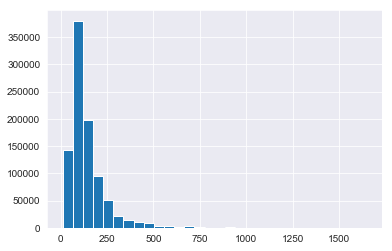

In [63]:
df_cal['price'].hist(bins=30,)

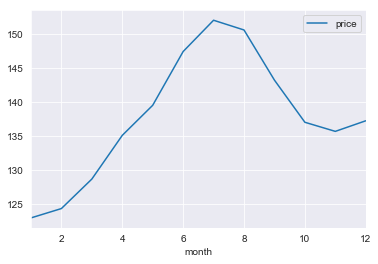

In [64]:
pd.DataFrame(df_cal.groupby(['month'])['price'].mean()).plot()

import matplotlib.pyplot as plt

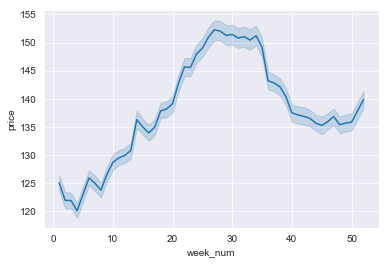

In [65]:
ax1 = sns.lineplot(x=df_cal['week_num'],y=df_cal['price'])

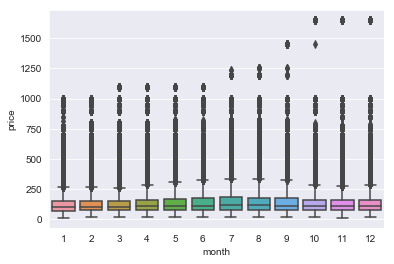

In [66]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],)

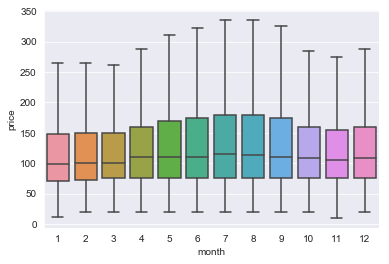

In [67]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],showfliers=False)

In [15]:
mod = ols('price ~ month',data=df_cal).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq        df            F  PR(>F)
month     1.808500e+07       1.0  1641.275915     0.0
Residual  1.029757e+10  934540.0          NaN     NaN


In [121]:
df_cal2=0

In [122]:
#Create a boxplot
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_cal2 = df_cal
df_cal2['month'] = df_cal2['month'].apply(lambda x: month[x])

[Text(0,0.5,'price ($/night)'), Text(0.5,0,'')]

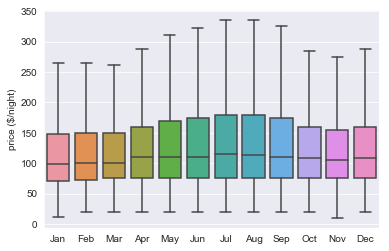

In [123]:
fig_month = sns.boxplot(y=df_cal2['price'],x=df_cal2['month'],showfliers=False)
fig_month.set(xlabel = '',ylabel='price ($/night)')

## END OF QUESTION 1

Question 2:  Know your capacity?   Waht neighborhoods/property type/property attributes sell better?

In [17]:
def compile_and_clean_attr_data(df_list,df_cal):
    
    #Using the average list prices in df_cal['price'] vs the current listing price df_list['price']
    df_avg_price = pd.DataFrame(df_cal.groupby(by=['listing_id'])['price'].mean())
    df_list = df_list.drop(columns='price')
    
    
    df = df_avg_price.merge(df_list,left_index=True,right_index=True)
    
    #Strip Xs down to the property/physical attributes of the property
    ammenities = list(df.filter(like='amm').columns.values)
    physical_attr_loc = ['price','bathrooms','bedrooms','beds','neighbourhood_cleansed',
                     'neighbourhood_group_cleansed','property_type','room_type','bed_type',
                    'accommodates','guests_included'] + ammenities
    
    df = df[physical_attr_loc]
    ##Clean Nas 
    
    # Drop all rows without a y (price)
    df = df.dropna(axis=0,subset=['price'])
    
    # Dropping rows b/c The following had a low number of n/a rows and would be difficult to impute, 
    df = df.drop(index=df.loc[df['bedrooms'].isna(),:].index )
    df = df.drop(index=df.loc[df['property_type'].isna(),:].index )
    df = df.drop(index=df.loc[df['bathrooms'].isna(),:].index )
    
    
    #Creating a log-transformed price column to 
    df.insert(column='price_log',loc=1,value=np.nan)
    df['price_log'] = df['price'].apply(lambda x: np.log(x))
    
    # One hot encode the categorical columns
    cat_col = list(df.select_dtypes(include='category').columns.values)
    df = df.merge(pd.get_dummies(df[cat_col],prefix_sep='::'),right_index=True, left_index=True)
    df = df.drop(columns=cat_col)
    
    #Standardize
    std_col = ['price','price_log']
    
    #Normalize
    norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']
    
    return df

In [18]:
df_q2 = compile_and_clean_attr_data(df_listing,df_cal)

#### Standardize and Normalize


In [19]:
#Standardize
std_col = ['price','price_log']
blah = StandardScaler()

df_q2[std_col] = blah.fit_transform(df_q2[std_col])

#Normalize
norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']

df_q2[norm_col] = normalize(df_q2[norm_col])

#### Linear Model

In [20]:
df_q2_X = df_q2.drop(columns=['price','price_log'])
df_q2_y1 = df_q2['price']
df_q2_y2 = df_q2['price_log']

q2_model = LinearRegression()

q2_log_model = LinearRegression()

q2_X_train, q2_X_test, q2_y1_train, q2_y1_test, q2_y2_train, q2_y2_test = train_test_split(df_q2_X,df_q2_y1,df_q2_y2,test_size = 0.3,random_state=72)

q2_model.fit(q2_X_train,q2_y1_train)

q2_log_model.fit(q2_X_train,q2_y2_train)

q2_y1_predict = q2_model.predict(q2_X_test)

q2_y2_predict = q2_log_model.predict(q2_X_test)

In [21]:
r2_score(q2_y1_test,q2_y1_predict)

-5.357427914636588e+20

In [22]:
r2_score(q2_y2_test,q2_y2_predict)

-3.5044272398214136e+20

In [23]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = q2_X_train.columns
coefs_df['coefs'] = q2_model.coef_
coefs_df['abs_coefs'] = np.abs(q2_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df[0:15]

,est_int,coefs,abs_coefs
169,room_type::Shared room,-8.479426e+11,8.479426e+11
168,room_type::Private room,-8.479426e+11,8.479426e+11
167,room_type::Entire home/apt,-8.479426e+11,8.479426e+11
163,property_type::Tent,-4.700165e+11,4.700165e+11
157,property_type::Chalet,-4.700165e+11,4.700165e+11
151,property_type::Apartment,-4.700165e+11,4.700165e+11
158,property_type::Condominium,-4.700165e+11,4.700165e+11
165,property_type::Treehouse,-4.700165e+11,4.700165e+11
155,property_type::Cabin,-4.700165e+11,4.700165e+11
161,property_type::Loft,-4.700165e+11,4.700165e+11


In [24]:
coefs_df['type'] = coefs_df['est_int'].apply(lambda x: x.split(':')[0])

In [25]:
coefs_df.groupby(by='type')['abs_coefs'].mean().sort_values(ascending=False).head(6)

type
room_type                       8.479426e+11
property_type                   4.406404e+11
bed_type                        1.370605e+11
neighbourhood_group_cleansed    4.714565e+10
neighbourhood_cleansed          4.196420e+10
bathrooms                       1.727845e+00
Name: abs_coefs, dtype: float64

In [71]:
df_q2 = df_q2.drop(columns='price_log')

In [72]:
df_q2_corr = df_q2.corr().sort_values(by='price',ascending=False)

df_q2_corr = df_q2_corr[['price']]

df_q2_corr.insert(loc=0,column='type',value=df_q2_corr.index)

df_q2_corr.loc[:,'type'] = df_q2_corr['type'].apply(lambda x: x.split(':')[0])

list(df_q2_corr.head(8).index)

['price',
 'room_type::Entire home/apt',
 'amm::Family/Kid Friendly',
 'amm::Cable TV',
 'accommodates',
 'amm::TV',
 'amm::Air Conditioning',
 'amm::Gym']

In [89]:
df_q2_corr = df_q2.corr().sort_values(by='price',ascending=False)

df_q2_corr = df_q2_corr[list(df_q2_corr.head(12).index)]

df_q2_corr.insert(loc=0,column='type',value=df_q2_corr.index)

df_q2_corr.loc[:,'type'] = df_q2_corr['type'].apply(lambda x: x.split(':')[0])

df_q2_abrv = df_q2_corr.sort_values(by='price',ascending=False).head(12)
df_q2_abrv.drop(columns='type')
df_q2_abrv[['price']]

,price
price,1.000000
room_type::Entire home/apt,0.451405
amm::Family/Kid Friendly,0.278299
amm::Cable TV,0.277180
accommodates,0.231935
amm::TV,0.229050
amm::Air Conditioning,0.174315
amm::Gym,0.173506
neighbourhood_group_cleansed::Downtown,0.172772
amm::Hot Tub,0.167602


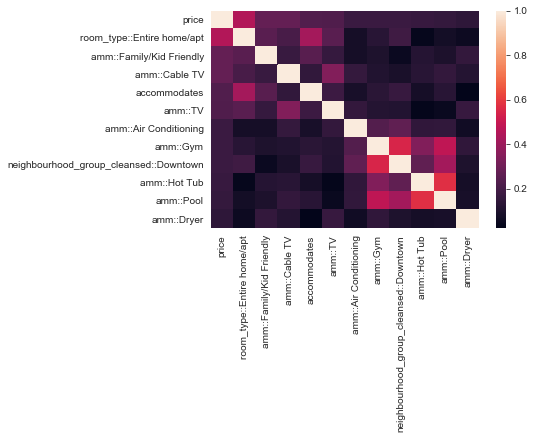

In [83]:
sns.heatmap(df_q2_abrv.drop(columns='price'))

In [156]:
df_room_type= df_cal.merge(df_listing[['room_type']],left_index=True,right_index=True)

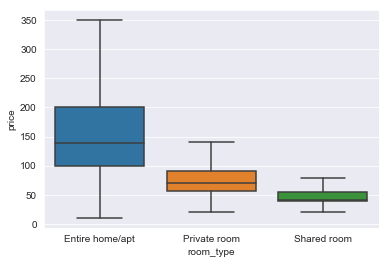

In [157]:
sns.boxplot(x=df_room_type['room_type'],y=df_room_type['price'],showfliers=False)

In [162]:
df_room_type.groupby(by='room_type')['price'].median()

room_type
Entire home/apt    139.0
Private room        70.0
Shared room         40.0
Name: price, dtype: float64

In [159]:
df_room_type.insert(loc=7,column='home/apt',value=False)

In [160]:
df_room_type.loc[:,'home/apt'] = df_room_type['room_type'].apply(lambda x: True if x == 'Entire home/apt' else False)

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


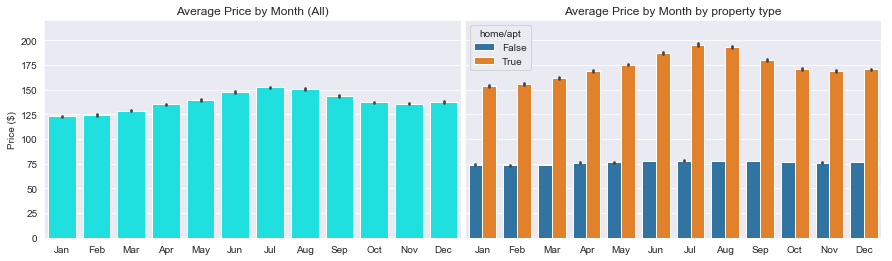

In [161]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_room_type['month'],y=df_room_type['price'],hue=df_room_type['home/apt'],ax=ax[1])
sns.barplot(x=df_room_type['month'],y=df_room_type['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month by property type')
ax[0].set_title('Average Price by Month (All)')
f.show()

In [35]:
df_amm = df_cal.merge(df_listing.filter(like='amm'),left_index=True,right_index=True)

[Text(0,0.5,'price ($/night)'), Text(0.5,0,'')]

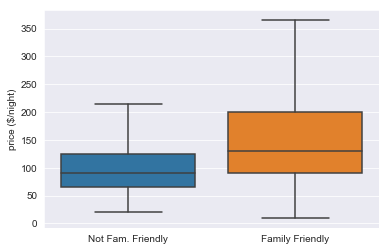

In [94]:
fig_fam = sns.boxplot(x=df_amm['amm::Family/Kid Friendly'],y=df_room_type['price'],showfliers=False)
fig_fam.set_xticklabels(labels = ['Not Fam. Friendly','Family Friendly'])
fig_fam.set(xlabel = '',ylabel='price ($/night)')

In [132]:
df_amm.groupby('amm::Family/Kid Friendly')[['price','amm::Family/Kid Friendly']].median()

,price,amm::Family/Kid Friendly
amm::Family/Kid Friendly,,
0,90.0,0
1,130.0,1


In [128]:
df_amm.groupby(by='amm::Family/Kid Friendly').median()

,available,price,week_num,month,year,amm::,amm::24-Hour Check-in,amm::Air Conditioning,amm::Breakfast,amm::Buzzer/Wireless Intercom,...,amm::Safety Card,amm::Shampoo,amm::Smoke Detector,amm::Smoking Allowed,amm::Suitable for Events,amm::TV,amm::Washer,amm::Washer / Dryer,amm::Wheelchair Accessible,amm::Wireless Internet
amm::Family/Kid Friendly,,,,,,,,,,,,,,,,,,,,,
0,True,90.0,26,7,2016,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
1,True,130.0,26,7,2016,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1


In [37]:
df_amm_kid = df_cal.merge(df_listing[['amm::Family/Kid Friendly']],left_index=True,right_index=True)

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


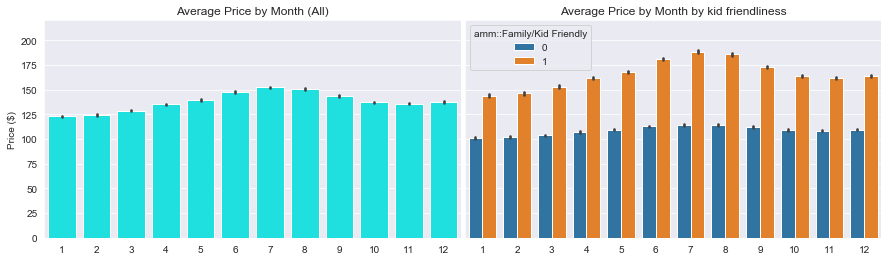

In [85]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_amm_kid['month'],y=df_amm_kid['price'],hue=df_amm_kid['amm::Family/Kid Friendly'],ax=ax[1])
sns.barplot(x=df_amm_kid['month'],y=df_amm_kid['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month by kid friendliness')
ax[0].set_title('Average Price by Month (All)')
f.show()

[Text(0,0.5,'price ($/night)'), Text(0.5,0,'')]

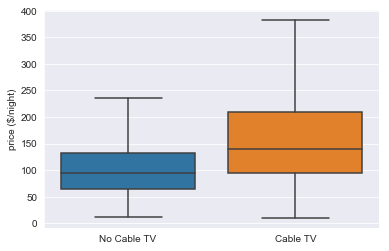

In [93]:
fig_cable = sns.boxplot(x=df_amm['amm::Cable TV'],y=df_room_type['price'],showfliers=False)
fig_cable.set_xticklabels(labels = ['No Cable TV','Cable TV'])
fig_cable.set(xlabel = '',ylabel='price ($/night)')

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


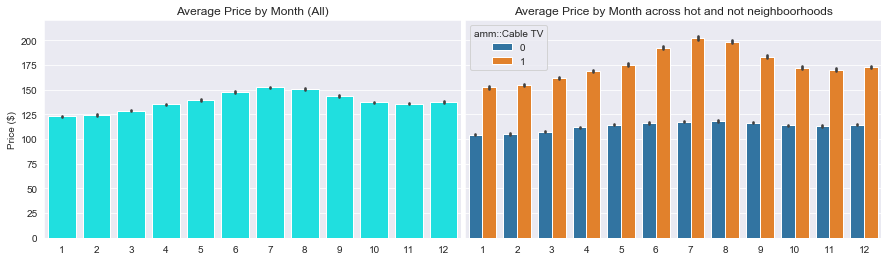

In [40]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_amm['month'],y=df_amm['price'],hue=df_amm['amm::Cable TV'],ax=ax[1])
sns.barplot(x=df_amm['month'],y=df_amm['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month across hot and not neighboorhoods')
ax[0].set_title('Average Price by Month (All)')
f.show()

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


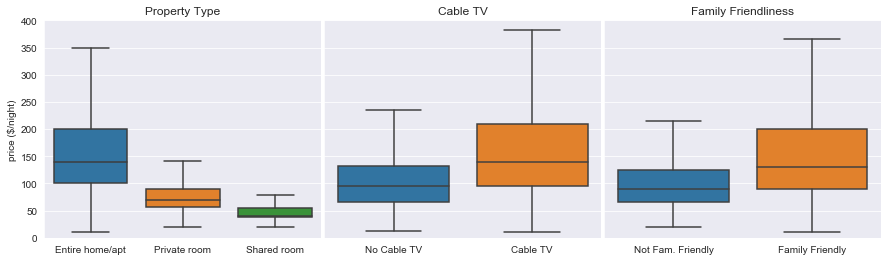

In [118]:
f,ax = plt.subplots(1,3,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.boxplot(x=df_room_type['room_type'],y=df_room_type['price'],showfliers=False,ax=ax[0])
sns.boxplot(x=df_amm['amm::Cable TV'],y=df_room_type['price'],showfliers=False,ax=ax[1])
sns.boxplot(x=df_amm['amm::Family/Kid Friendly'],y=df_room_type['price'],showfliers=False,ax=ax[2])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 400))
ax[0].set(ylim=(0, 400))
ax[2].set(ylim=(0, 400))

ax[1].set_xticklabels(labels = ['No Cable TV','Cable TV'])
ax[2].set_xticklabels(labels = ['Not Fam. Friendly','Family Friendly'])

ax[0].set_ylabel('price ($/night)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

ax[0].set_title('Property Type')
ax[1].set_title('Cable TV')
ax[2].set_title('Family Friendliness')
f.show()

In [96]:
df_acc = df_cal.merge(df_listing[['accommodates']],left_index=True,right_index=True)

Text(0,0.5,'price ($/night)')

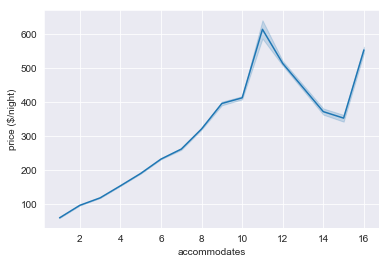

In [133]:
fig_acc = sns.lineplot(x=df_acc['accommodates'],y=df_acc['price'])
fig_acc.set_ylabel('price ($/night)')

In [135]:
df_acc.groupby(by='accommodates').median()

,available,price,week_num,month,year
accommodates,,,,,
1,True,50.0,26,7,2016
2,True,85.0,26,7,2016
3,True,105.0,26,7,2016
4,True,135.0,26,7,2016
5,True,175.0,26,7,2016
6,True,200.0,26,7,2016
7,True,240.0,26,7,2016
8,True,295.0,26,7,2016
9,True,400.0,26,7,2016


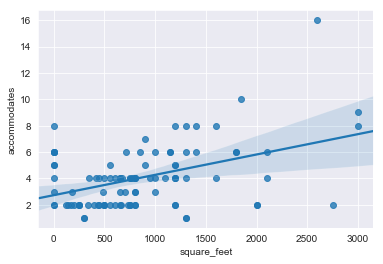

In [112]:
fig_acc.set_ylabel('price ($/night)')
fig_acc_sc = sns.regplot(x=df_acc_sqft['square_feet'],y=df_acc_sqft['accommodates'])

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


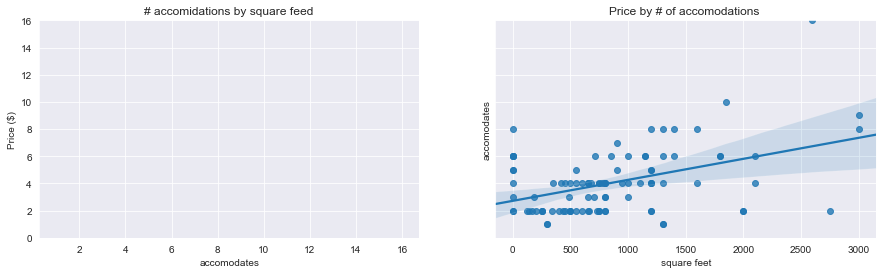

In [145]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.lineplot(x=df_acc['accommodates'],y=df_acc['price'],ax=ax[0])
sns.regplot(x=df_acc_sqft['square_feet'],y=df_acc_sqft['accommodates'],ax=ax[1])

f.subplots_adjust(wspace=0.2, hspace=0)

ax[0].set(ylim=(0, 600))
ax[1].set(ylim=(0, 16))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('accomodates')
ax[0].set_xlabel('accomodates')
ax[1].set_xlabel('square feet')

ax[1].set_title('Price by # of accomodations ')
ax[0].set_title('# accomidations by square feed')
f.show()

In [31]:
#### PCA MODEL

In [32]:
model_1 = pca.PCA(n_components=35)

q2_X_pca = model_1.fit_transform(df_q2_X)

model_1.explained_variance_ratio_.sum()

0.8119070037636605

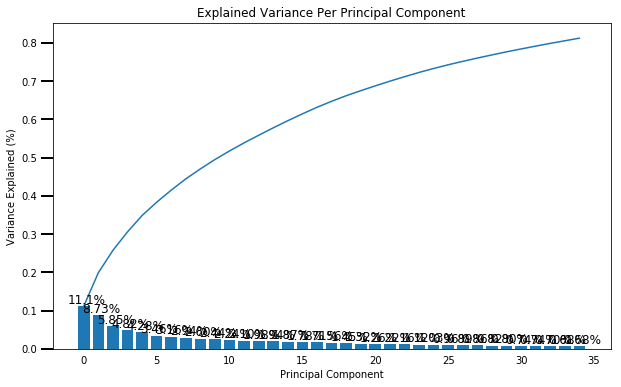

In [33]:
h.scree_plot(model_1)

In [34]:
df_q2_X_pca = pd.DataFrame(q2_X_pca)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_q2_X_pca,df_q2_y1,test_size = 0.3,random_state=72)

lmodel_pca = LinearRegression()

lmodel_pca.fit(X_train_pca,y_train)

y_predict_pca = lmodel_pca.predict(X_test_pca)

r2_score(y_test,y_predict_pca)

0.35702402012082757

In [35]:
coefs_pca_df = pd.DataFrame()
coefs_pca_df['est_int'] = X_train_pca.columns
coefs_pca_df['coefs'] = lmodel_pca.coef_
coefs_pca_df['abs_coefs'] = np.abs(lmodel_pca.coef_)
coefs_pca_df = coefs_pca_df.sort_values('abs_coefs', ascending=False)
coefs_pca_df[0:5]

,est_int,coefs,abs_coefs
2,2,-0.525450,0.525450
24,24,0.360874,0.360874
14,14,0.355123,0.355123
3,3,-0.339888,0.339888
0,0,0.301808,0.301808


In [36]:
pca_results = h.pca_results_rng(df_q2_X,model_1,[1,25])
pca_results.head()

,Explained Variance,bathrooms,bedrooms,beds,accommodates,guests_included,amm::,amm::24-Hour Check-in,amm::Air Conditioning,amm::Breakfast,...,property_type::Treehouse,property_type::Yurt,room_type::Entire home/apt,room_type::Private room,room_type::Shared room,bed_type::Airbed,bed_type::Couch,bed_type::Futon,bed_type::Pull-out Sofa,bed_type::Real Bed
Dimension 1,0.1115,-0.0366,-0.0361,-0.0023,0.0369,-0.0091,-0.0165,0.2057,0.1159,-0.0288,...,-0.0010,-0.0001,0.2740,-0.2592,-0.0148,-0.0026,0.0000,-0.0089,-0.0027,0.0142
Dimension 2,0.0873,0.0061,-0.0238,-0.0013,0.0089,-0.0068,0.0254,-0.1270,-0.0108,-0.0414,...,0.0006,-0.0001,0.1061,-0.1207,0.0146,0.0002,0.0024,0.0056,0.0015,-0.0097
Dimension 3,0.0585,0.0482,0.0045,-0.0024,-0.0359,0.0276,0.0226,0.2456,-0.0417,0.0462,...,0.0009,0.0001,-0.2996,0.2776,0.0220,0.0053,0.0027,0.0101,0.0107,-0.0289
Dimension 4,0.0482,0.0354,-0.0023,-0.0104,-0.0171,0.0173,-0.0146,-0.1414,0.0485,0.0590,...,-0.0000,0.0008,-0.2042,0.1770,0.0272,0.0061,0.0021,0.0163,0.0051,-0.0296
Dimension 5,0.0428,0.0476,0.0408,0.0004,-0.0317,-0.0065,-0.0187,-0.0143,0.1016,0.0354,...,-0.0004,-0.0008,-0.3936,0.3731,0.0204,0.0031,0.0029,0.0125,0.0049,-0.0233


In [37]:
pca_results = pca_results.drop(columns='Explained Variance')

In [52]:
pca_coefs_df = pd.DataFrame()
pca_coefs_df['est_int'] = X_train_pca.columns
pca_coefs_df['coefs'] = lmodel_pca.coef_
pca_coefs_df['abs_coefs'] = np.abs(lmodel_pca.coef_)
pca_coefs_df = pca_coefs_df.sort_values('abs_coefs', ascending=False)
pca_coefs_df.head(6)

,est_int,coefs,abs_coefs
2,2,-0.525450,0.525450
24,24,0.360874,0.360874
14,14,0.355123,0.355123
3,3,-0.339888,0.339888
0,0,0.301808,0.301808
6,6,-0.263359,0.263359


In [40]:
#pca_results = pca_results.drop(columns='dim')
pca_results.insert(loc=0,column='dim',value=pca_results.index)
pca_results['dim'] = pca_results['dim'].apply(lambda x: int(x.split(' ')[1]))
pcar2 = pca_results.set_index('dim')

In [46]:
print(pca_results.loc['Dimension 3',:].sort_values(ascending=False)[0:4])
print(pca_results.loc['Dimension 3',:].sort_values(ascending=True)[0:4])

dim                               3.0000
amm::Hangers                      0.3291
amm::Hair Dryer                   0.3085
amm::Laptop Friendly Workspace    0.2998
Name: Dimension 3, dtype: float64
room_type::Entire home/apt   -0.2996
amm::Family/Kid Friendly     -0.2799
amm::Cable TV                -0.2343
amm::TV                      -0.2245
Name: Dimension 3, dtype: float64


In [ ]:
#0.36  - Queen anne neibghboorhood

In [47]:
print(pca_results.loc['Dimension 25',:].sort_values(ascending=False)[0:4])
print(pca_results.loc['Dimension 25',:].sort_values(ascending=True)[0:4])

dim                                           25.0000
neighbourhood_group_cleansed::Queen Anne       0.4765
amm::Dog(s)                                    0.2575
neighbourhood_group_cleansed::Central Area     0.1902
Name: Dimension 25, dtype: float64
amm::Cat(s)                             -0.2936
amm::Kitchen                            -0.2346
amm::Buzzer/Wireless Intercom           -0.2142
neighbourhood_group_cleansed::Ballard   -0.1902
Name: Dimension 25, dtype: float64


In [ ]:
#Dimention 3 : -0.545
Pos Attributes (FAMILY FRIENDLY/TV/Cable TV)
Neg Attributes (Hangers/HairDryer Laptop friendly)
#Dimention 25 - 0.361
Pos Attributes - (queen ann neighborhood,amm:dog, Central )
Neg Attributes - (cat,kitchen,buzzer, Ballard neighborhood)
#Dimention 15 - 0.355
Pos Attributes - (amm:shampoo, Capitol Hill neigh, Broadway neigh)
Neg Attribute - (neighborhood - Central Area)


In [48]:
print(pca_results.loc['Dimension 15',:].sort_values(ascending=False)[0:4])
print(pca_results.loc['Dimension 15',:].sort_values(ascending=True)[0:4])

dim                                           15.0000
amm::Shampoo                                   0.4385
neighbourhood_group_cleansed::Capitol Hill     0.3427
neighbourhood_cleansed::Broadway               0.2722
Name: Dimension 15, dtype: float64
amm::TV                                      -0.3047
amm::Internet                                -0.2694
neighbourhood_group_cleansed::Central Area   -0.2269
amm::Family/Kid Friendly                     -0.1522
Name: Dimension 15, dtype: float64


In [49]:
print(pca_results.loc['Dimension 4',:].sort_values(ascending=False)[0:4])
print(pca_results.loc['Dimension 4',:].sort_values(ascending=True)[0:4])

dim                              4.0000
amm::First Aid Kit               0.3936
amm::Fire Extinguisher           0.3171
amm::Carbon Monoxide Detector    0.3168
Name: Dimension 4, dtype: float64
property_type::House            -0.2308
amm::Free Parking on Premises   -0.2180
room_type::Entire home/apt      -0.2042
amm::Family/Kid Friendly        -0.1754
Name: Dimension 4, dtype: float64


In [50]:
print(pca_results.loc['Dimension 1',:].sort_values(ascending=False)[0:4])
print(pca_results.loc['Dimension 1',:].sort_values(ascending=True)[0:4])

dim                           1.0000
property_type::Apartment      0.2742
room_type::Entire home/apt    0.2740
amm::Hangers                  0.2616
Name: Dimension 1, dtype: float64
property_type::House                                -0.2787
room_type::Private room                             -0.2592
amm::Pets live on this property                     -0.1100
neighbourhood_group_cleansed::Other neighborhoods   -0.0796
Name: Dimension 1, dtype: float64


In [ ]:
pca_lin_model = LinearRegression()

q2_X_train, q2_X_test, q2_y1_train, q2_y1_test, q2_y2_train, q2_y2_test = train_test_split(df_q2_X,df_q2_y1,df_q2_y2,test_size = 0.3,random_state=72)

q2_model.fit(q2_X_train,q2_y1_train)

q2_log_model.fit(q2_X_train,q2_y2_train)

q2_y1_predict = q2_model.predict(q2_X_test)

q2_y2_predict = q2_log_model.predict(q2_X_test)

#### COMPARE NEIGHBOORHOODS

In [149]:
hot_neighboorhoods=['Magnolia','Downtown','Queen Anne','West Seattle']

def hotchecks(x,list):
    if x in hot_neighboorhoods:
        return True
    else:
        return False

df_neigh = df_cal.merge(df_listing[['neighbourhood_group_cleansed']],left_index=True,right_index=True)

df_neigh.insert(loc = df_neigh.shape[1],column='hot_neigh',value=False,)

df_neigh['hot_neigh'] = df_neigh['neighbourhood_group_cleansed'].apply(lambda x: hotchecks(x,hot_neighboorhoods))

month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#df_neigh['month'] = df_neigh['month'].apply(lambda x: month[x])

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


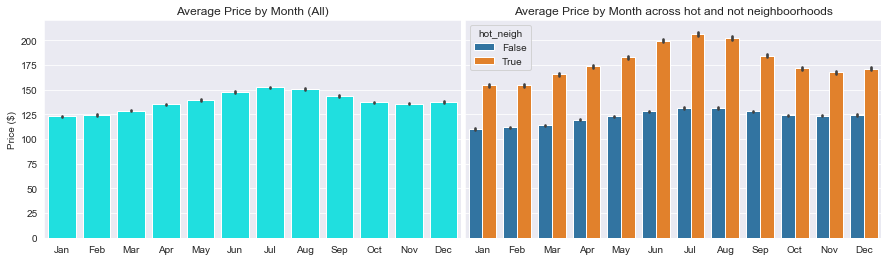

In [150]:
f,ax = plt.subplots(1,2,sharey=True)
f.set_figwidth(15)

sns.set_style('darkgrid')
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],hue=df_neigh['hot_neigh'],ax=ax[1])
sns.barplot(x=df_neigh['month'],y=df_neigh['price'],color='cyan',ax=ax[0])

f.subplots_adjust(wspace=0.01, hspace=0)

ax[1].set(ylim=(0, 220))
ax[0].set(ylim=(0, 220))

ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].set_title('Average Price by Month across hot and not neighboorhoods')
ax[0].set_title('Average Price by Month (All)')
f.show()

In [153]:
neighList = list(df_neigh.groupby(by='neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).index)

[Text(0,0.5,'price ($/night)'), Text(0.5,0,'')]

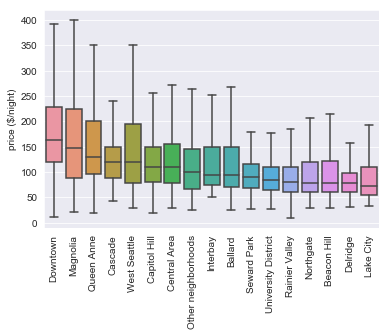

In [154]:
ax_neigh = sns.boxplot(x=df_neigh.neighbourhood_group_cleansed,y=df_neigh.price,showfliers=False,
            order=neighList)
ax_neigh.set_xticklabels(labels = neighList,rotation=90)
ax_neigh.set(xlabel = '',ylabel = 'price ($/night)')

In [155]:
df_neigh.groupby(by='neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False)

neighbourhood_group_cleansed
Downtown               164.0
Magnolia               147.0
Queen Anne             130.0
Cascade                120.0
West Seattle           119.0
Capitol Hill           110.0
Central Area           109.0
Other neighborhoods    100.0
Interbay                95.0
Ballard                 95.0
Seward Park             90.0
University District     85.0
Rainier Valley          80.0
Northgate               79.0
Beacon Hill             79.0
Delridge                78.0
Lake City               72.0
Name: price, dtype: float64